In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as stats

In [2]:
df = pd.read_csv("Datasets/Titanic-Dataset.csv",usecols = ["Age","Fare","Survived"])

In [3]:
df.head(5)

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [4]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [5]:
df.dtypes

Survived      int64
Age         float64
Fare        float64
dtype: object

In [6]:
df["Age"] = pd.to_numeric(df["Age"], errors="coerce")

In [7]:
df["Age"] = df["Age"].fillna(df["Age"].mean())

In [8]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [11]:
X = df.iloc[:,1:3]
y = df.iloc[:,0]

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

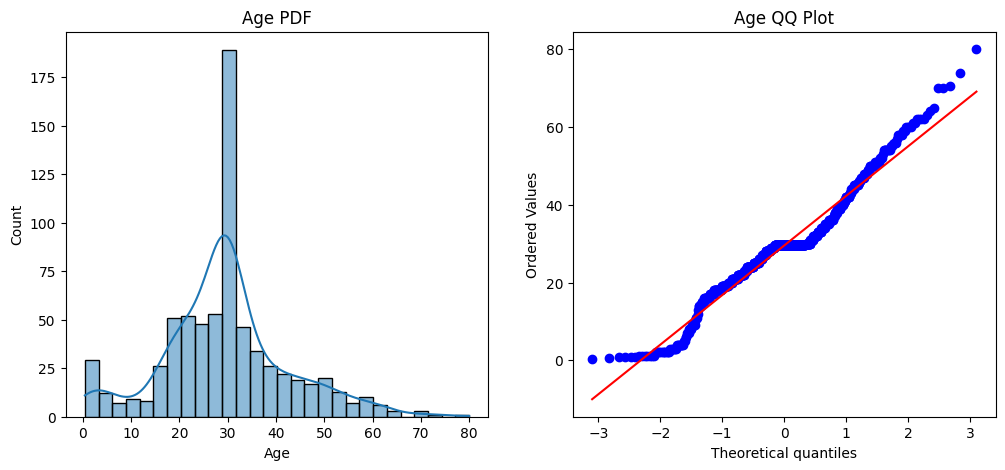

In [20]:
plt.figure(figsize = (12,5))

plt.subplot(1,2,1)
sns.histplot(X_train["Age"],kde = True)
plt.title("Age PDF")

plt.subplot(1,2,2)
stats.probplot(X_train["Age"],dist = "norm",plot = plt)
plt.title("Age QQ Plot")
plt.show()

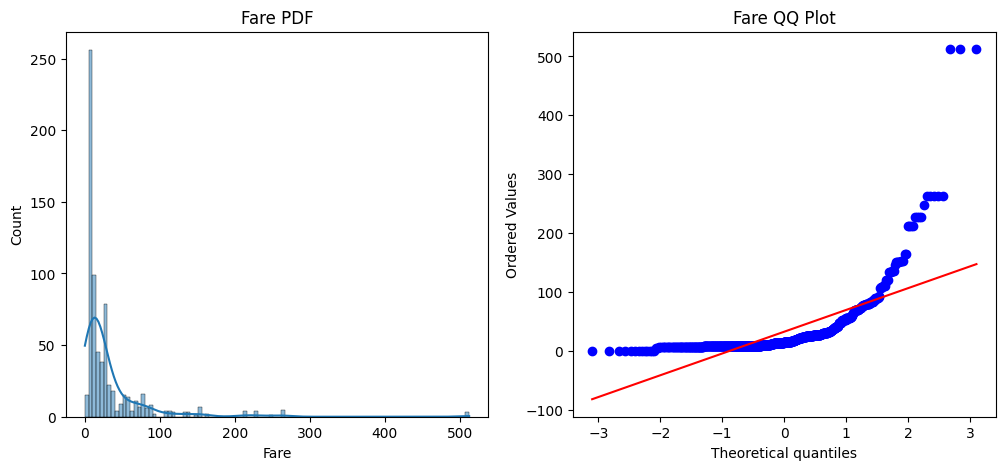

In [23]:
plt.figure(figsize = (12,5))

plt.subplot(1,2,1)
sns.histplot(X_train["Fare"],kde = True)
plt.title("Fare PDF")

plt.subplot(1,2,2)
stats.probplot(X_train["Fare"],dist = "norm",plot = plt)
plt.title("Fare QQ Plot")
plt.show()

### Note: we clearly see that Age column normally distributed but Fare Column is right skewed thats why we apply log transform on that column 

## Before Applying any transformation we check accuracy score

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [25]:
lr = LogisticRegression()
dtc = DecisionTreeClassifier()

In [27]:
lr.fit(X_train,y_train)
dtc.fit(X_train,y_train)

y_pred = lr.predict(X_test)
y_pred2 = dtc.predict(X_test)

print("LR Accuracy:",accuracy_score(y_test,y_pred))
print("DTC Accuracy:",accuracy_score(y_test,y_pred2))

LR Accuracy: 0.6480446927374302
DTC Accuracy: 0.664804469273743


## After Applying Log Tranformation

In [29]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [30]:
trf = FunctionTransformer(np.log1p) # log1p handle zeos with adding 1 

In [31]:
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)

In [32]:
lr = LogisticRegression()
dtc = DecisionTreeClassifier()

In [33]:
lr.fit(X_train_transformed,y_train)
dtc.fit(X_train_transformed,y_train)

y_pred = lr.predict(X_test_transformed)
y_pred2 = dtc.predict(X_test_transformed)

print("LR Accuracy:",accuracy_score(y_test,y_pred))
print("DTC Accuracy:",accuracy_score(y_test,y_pred2))

LR Accuracy: 0.6815642458100558
DTC Accuracy: 0.664804469273743


In [35]:
## to double check we check via CV also
X_transformed = trf.fit_transform(X)
lr = LogisticRegression()
dtc = DecisionTreeClassifier()
print("LR",np.mean(cross_val_score(lr,X_transformed,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(dtc,X_transformed,y,scoring='accuracy',cv=10)))

LR 0.678027465667915
DT 0.6667041198501872


### We can clearly see that after applying a log transformation, the accuracy score improves in Logistic Regression, but there is no change in the Decision Tree Classifier.

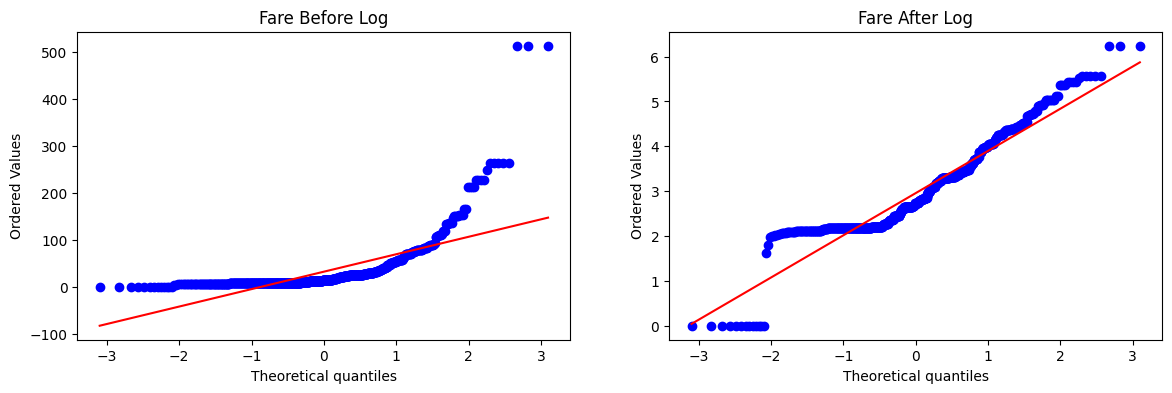

In [36]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Fare'], dist="norm", plot=plt)
plt.title('Fare Before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['Fare'], dist="norm", plot=plt)
plt.title('Fare After Log')

plt.show()

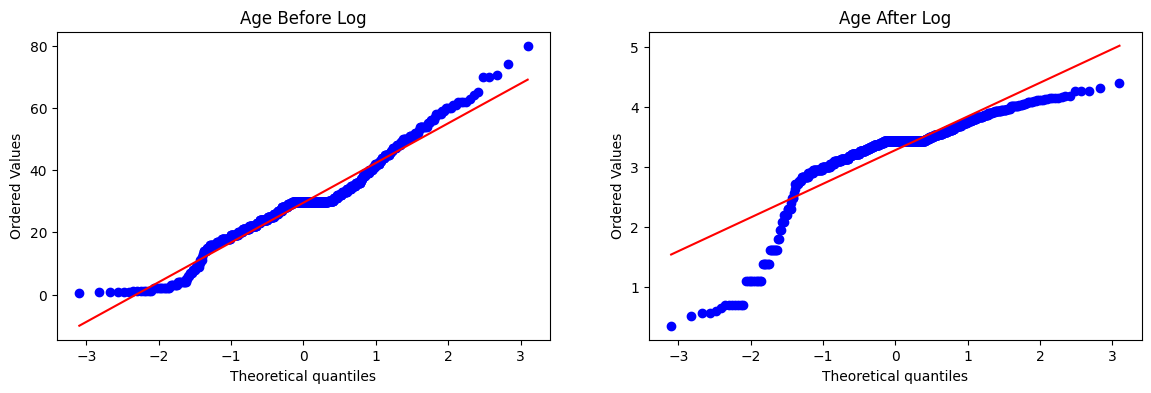

In [37]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Age'], dist="norm", plot=plt)
plt.title('Age Before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['Age'], dist="norm", plot=plt)
plt.title('Age After Log')

plt.show()


## Apply Transform Function --> You can apply resiprocal, sqrt, square, sin etc. Transformation

In [38]:
def apply_transform(transform):
    X = df.iloc[:,1:3]
    y = df.iloc[:,0]
    
    trf = ColumnTransformer([('log',FunctionTransformer(transform),['Fare'])],remainder='passthrough')
    
    X_trans = trf.fit_transform(X)
    
    clf = LogisticRegression()
    
    print("Accuracy",np.mean(cross_val_score(clf,X_trans,y,scoring='accuracy',cv=10)))
    
    plt.figure(figsize=(14,4))

    plt.subplot(121)
    stats.probplot(X['Fare'], dist="norm", plot=plt)
    plt.title('Fare Before Transform')

    plt.subplot(122)
    stats.probplot(X_trans[:,0], dist="norm", plot=plt)
    plt.title('Fare After Transform')

    plt.show()
    

Accuracy 0.6611485642946316


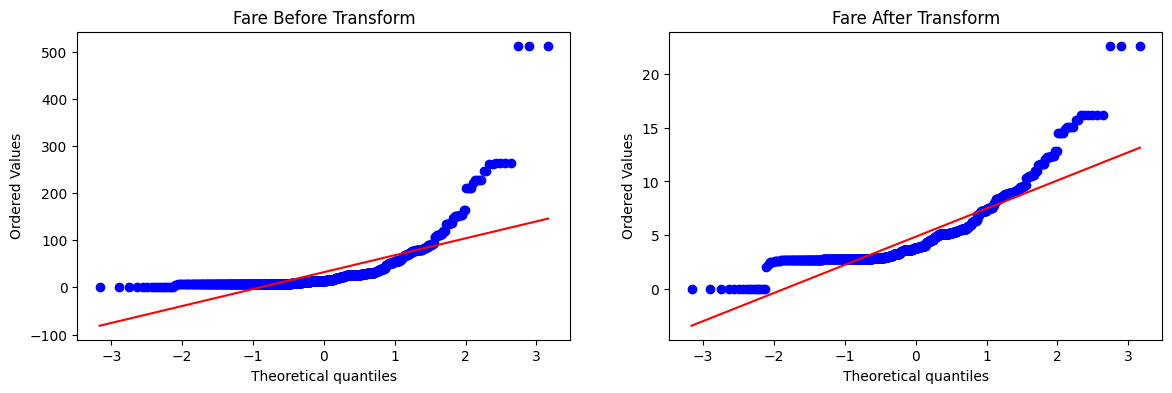

In [39]:
apply_transform(np.sqrt)

Accuracy 0.6431335830212235


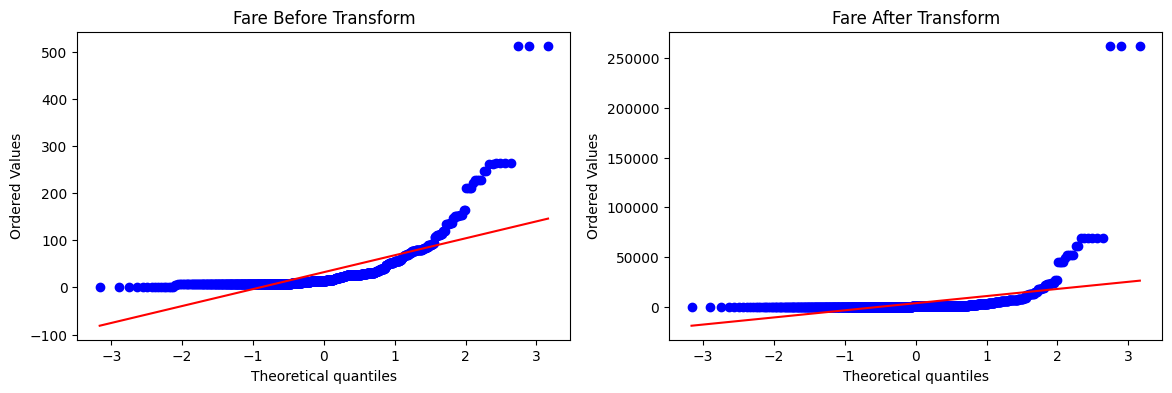

In [40]:
apply_transform(lambda x:x**2)

Accuracy 0.6589013732833957


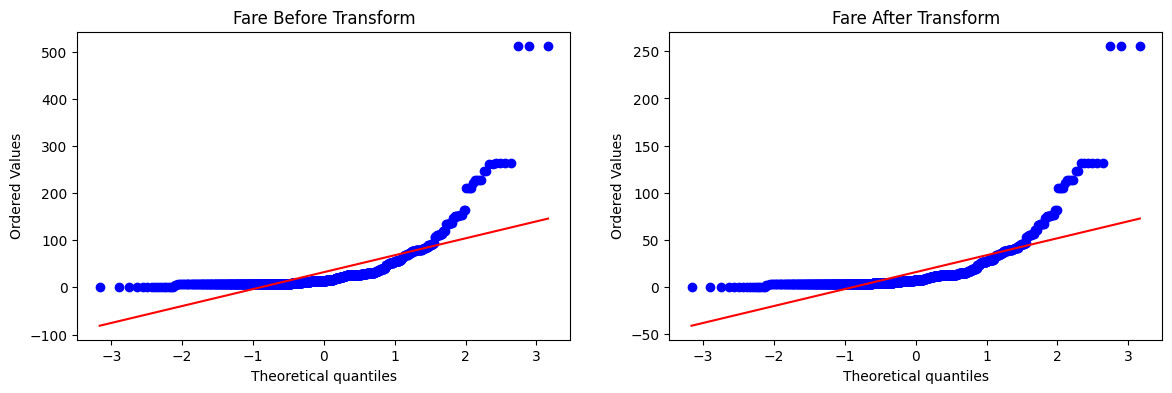

In [45]:
apply_transform(lambda x:x//2)

Accuracy 0.61729088639201


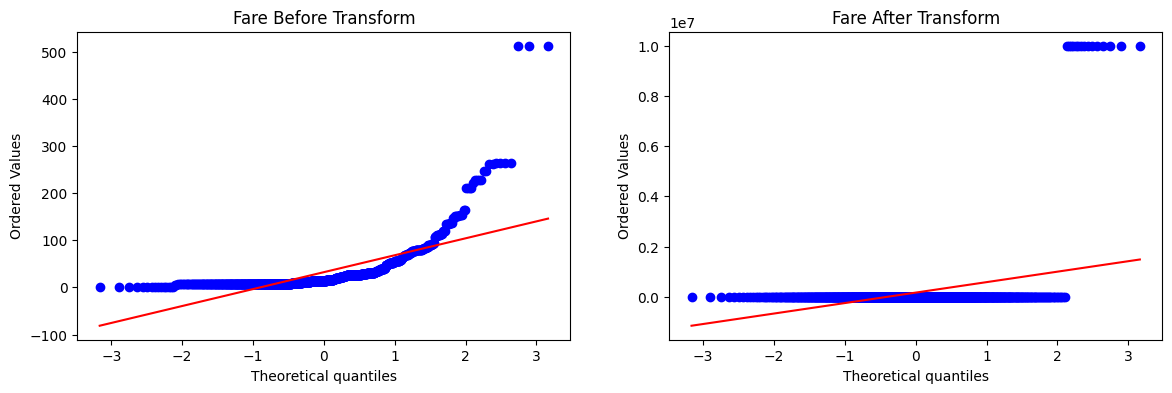

In [48]:
# Reciprocal Transformation
apply_transform(lambda x:1/(x+0.0000001))

Accuracy 0.6184144818976279


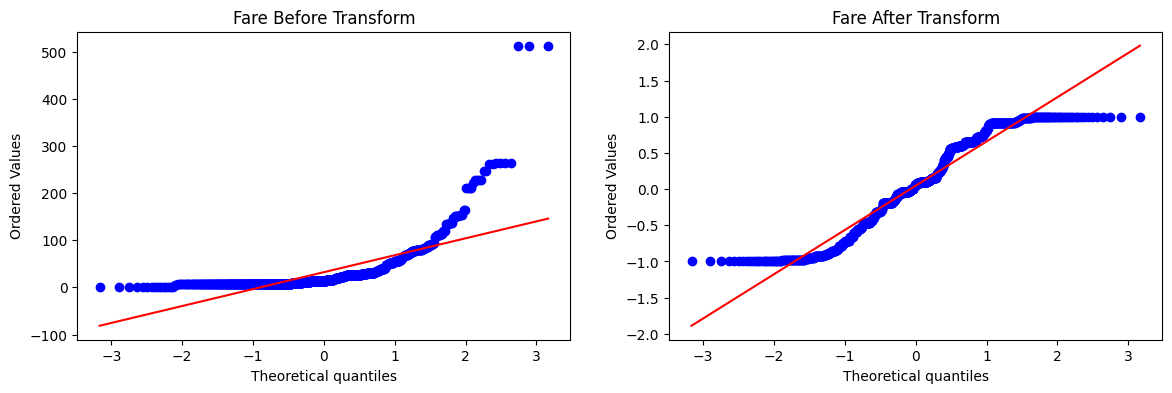

In [52]:
apply_transform(np.cos)